<a href="https://colab.research.google.com/github/janaghoniem/Housing-Prices-Prediction-using-Machine-Learning/blob/main/dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')

In [5]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dataset.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
dataset.shape

(1460, 81)

In [9]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
dataset.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


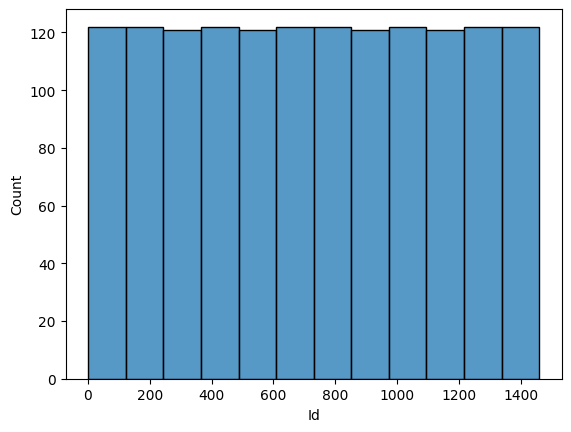

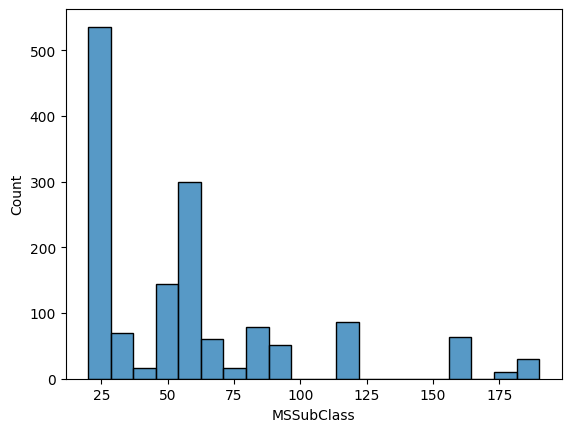

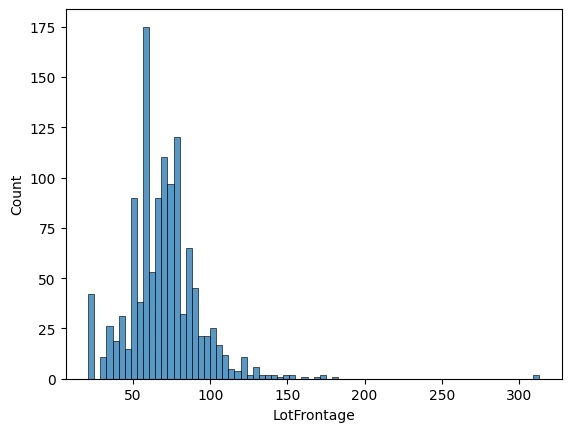

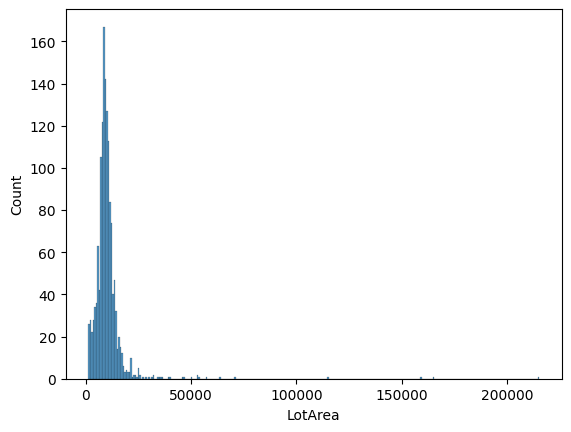

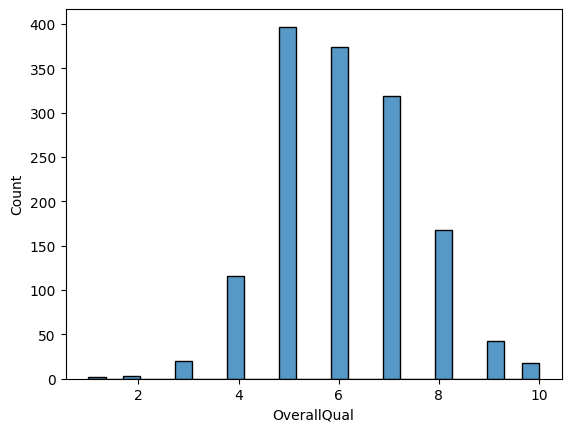

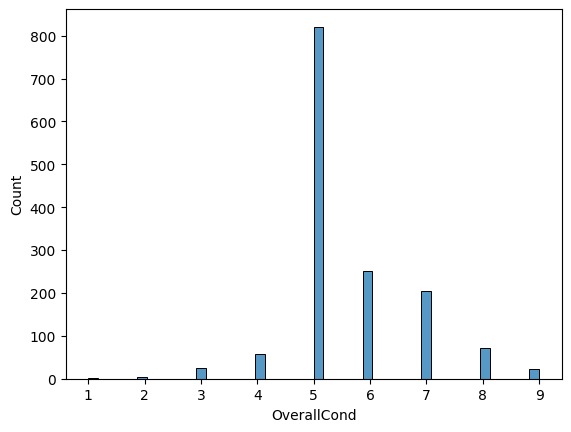

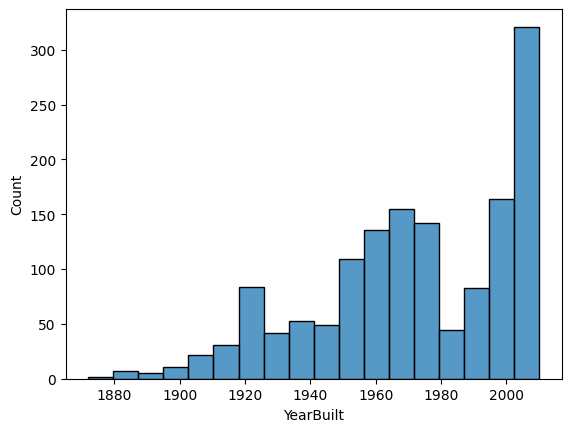

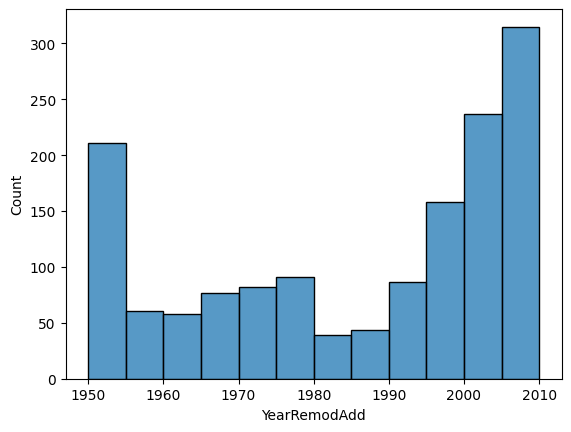

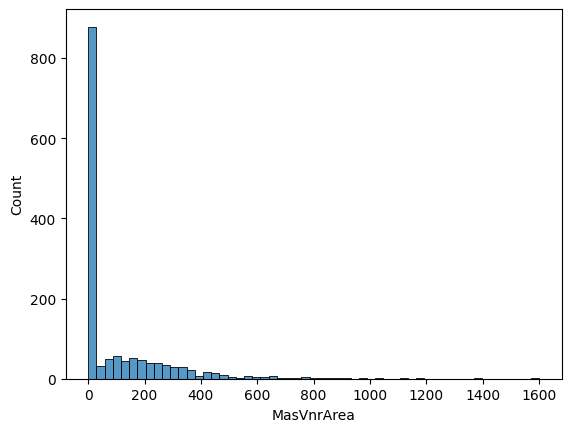

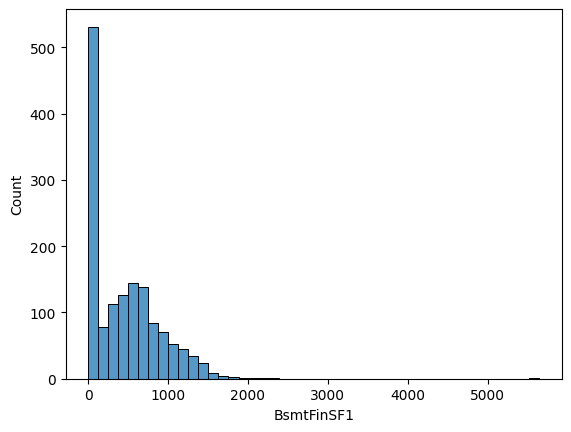

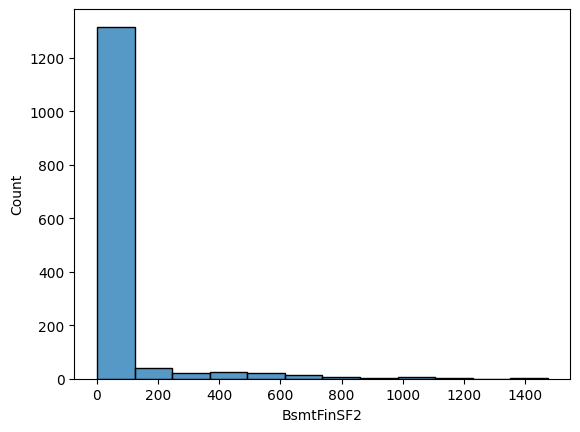

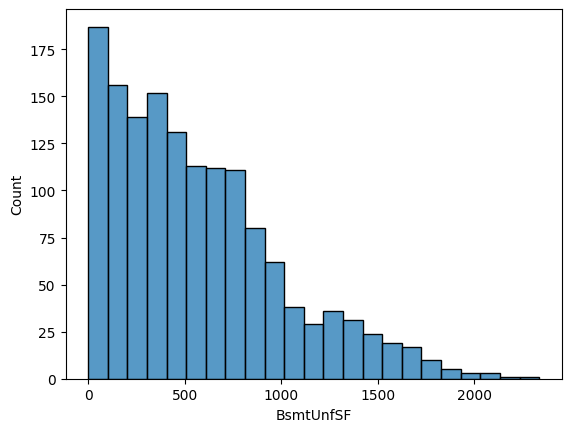

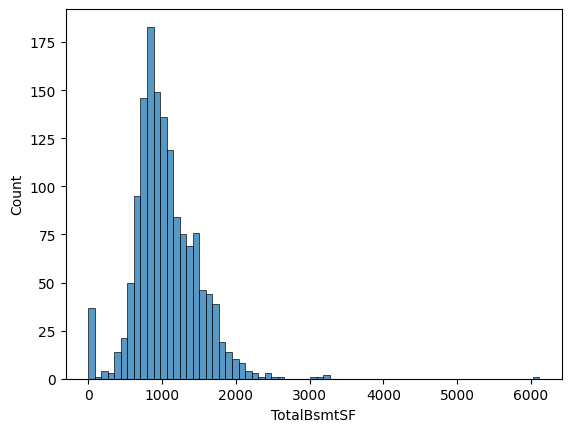

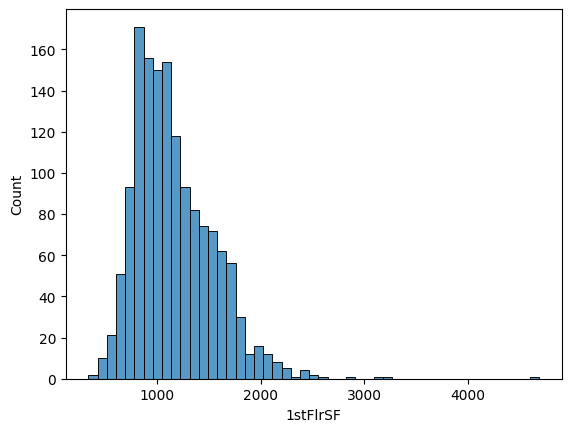

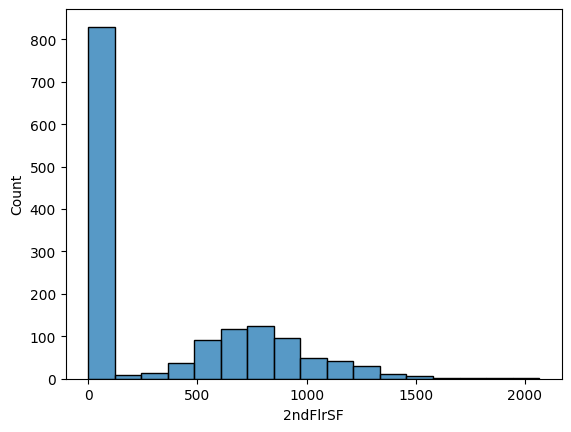

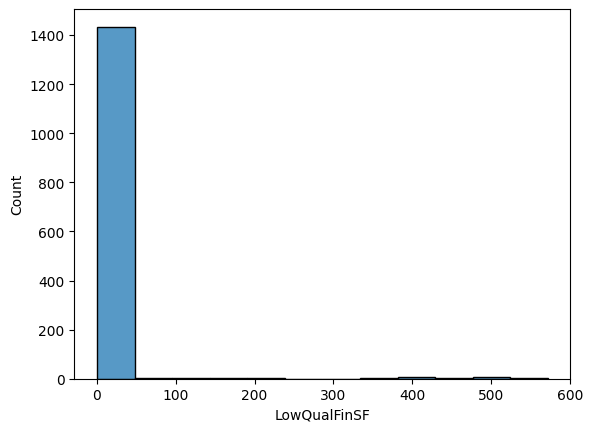

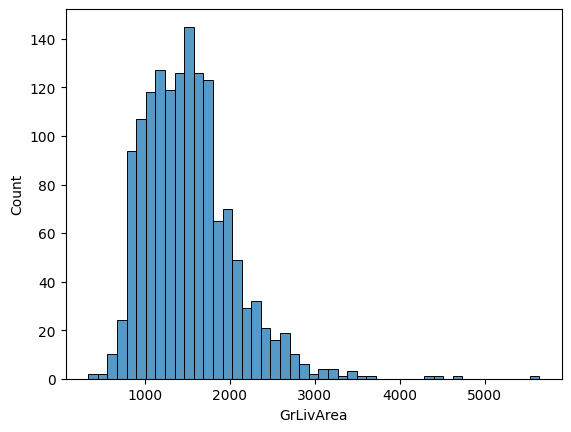

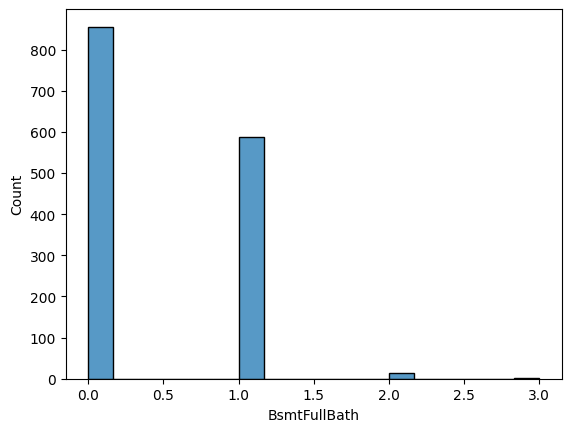

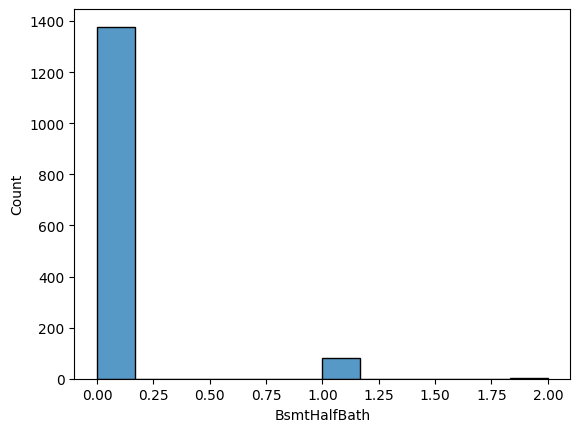

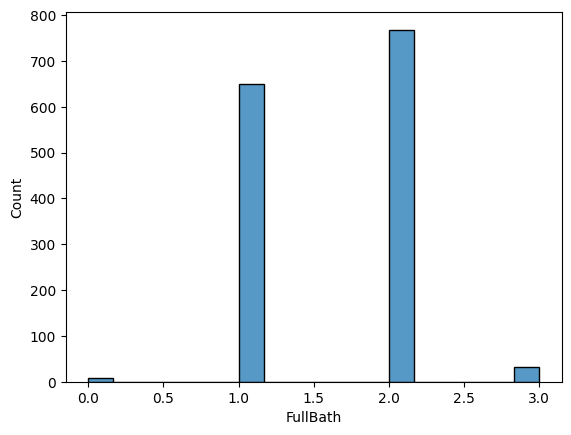

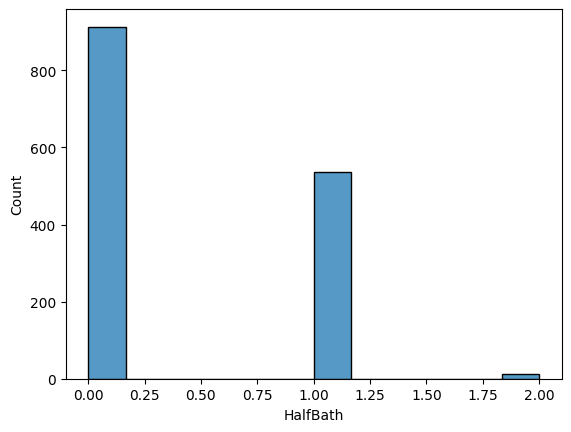

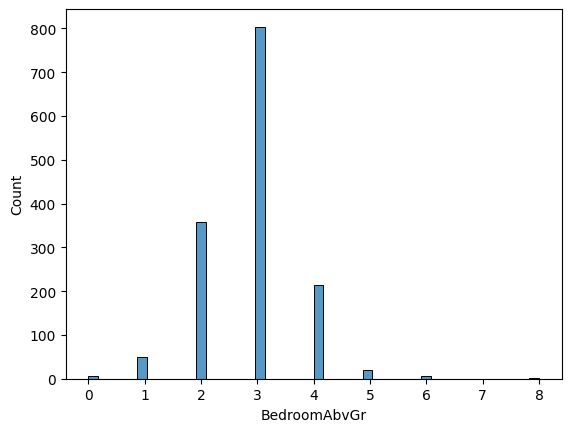

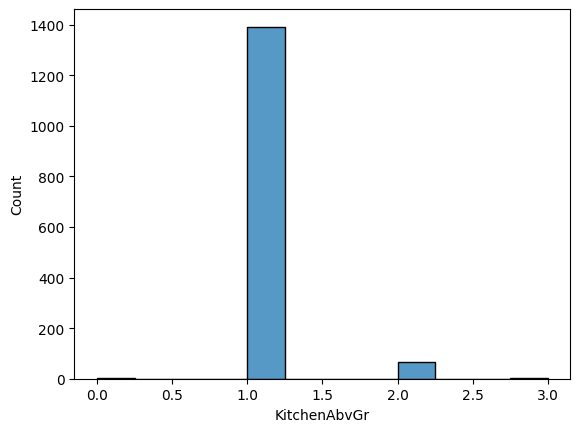

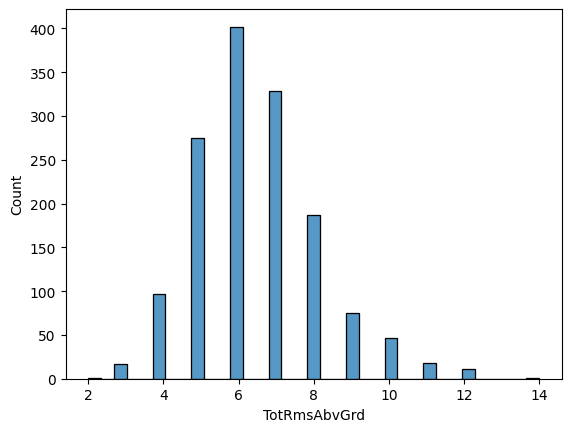

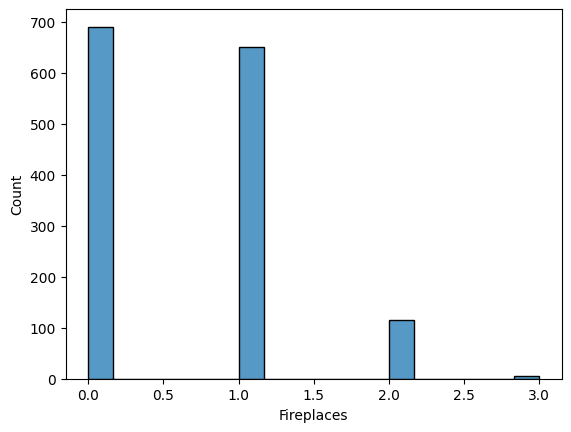

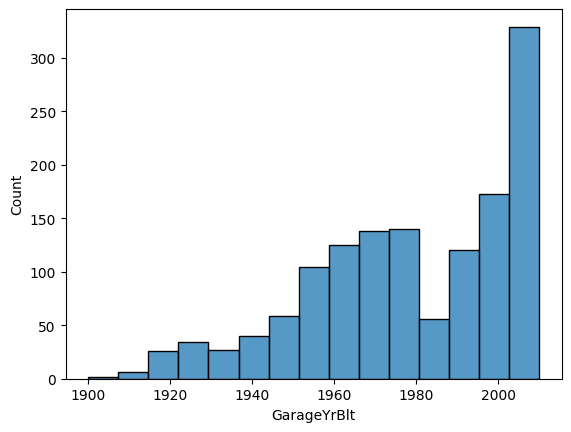

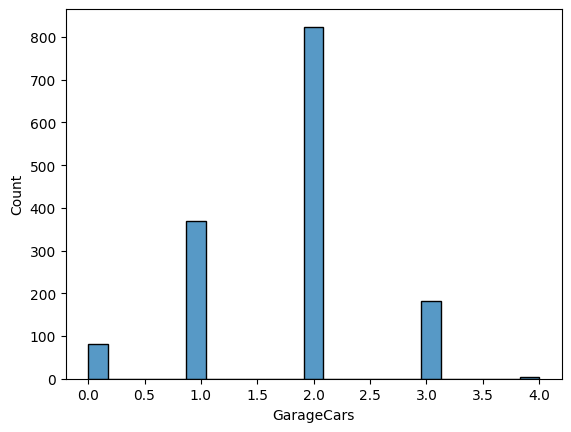

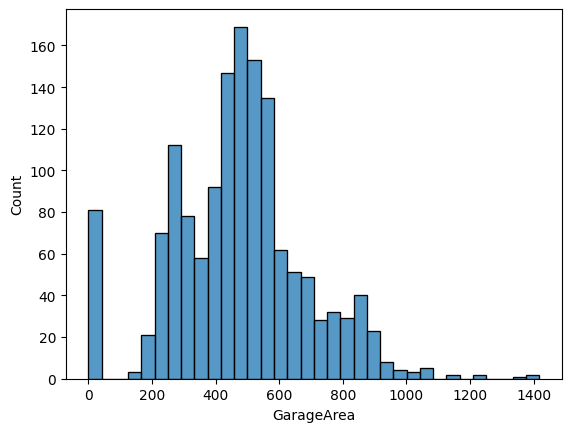

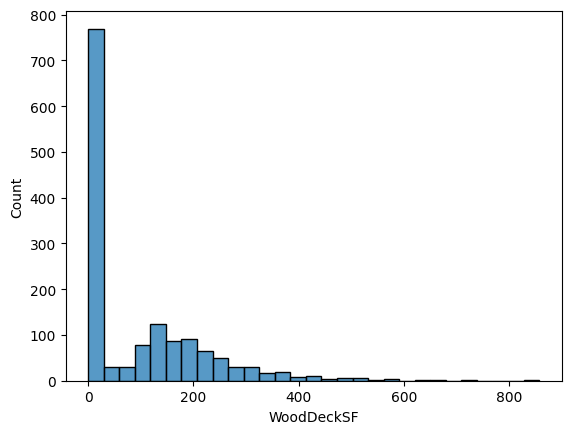

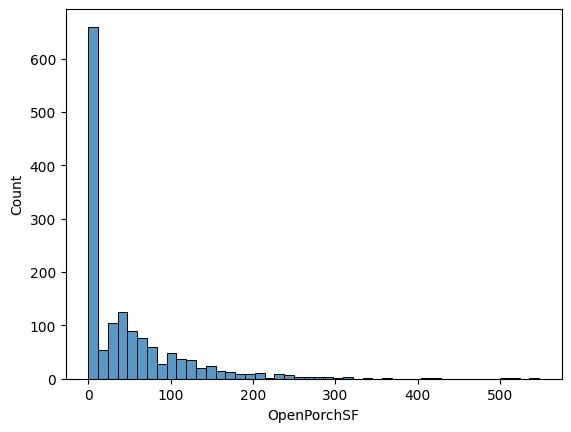

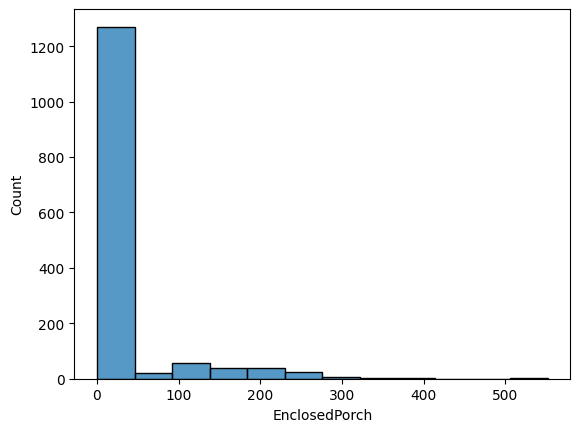

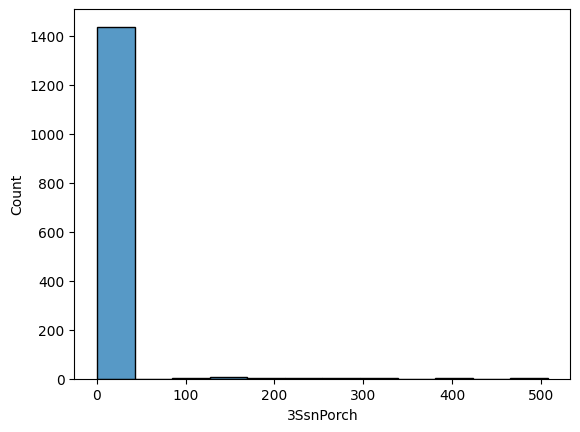

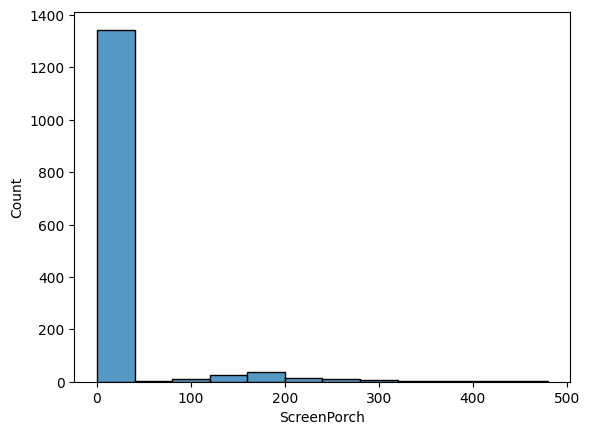

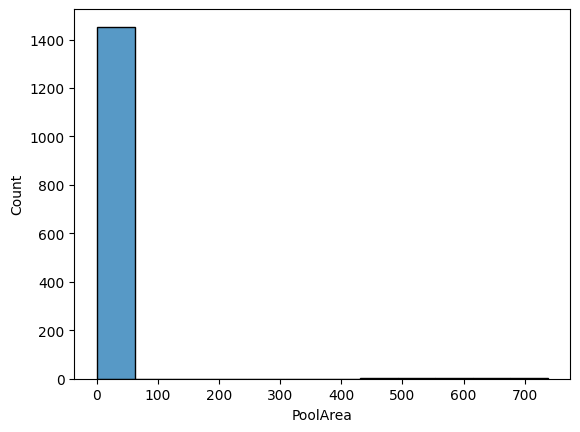

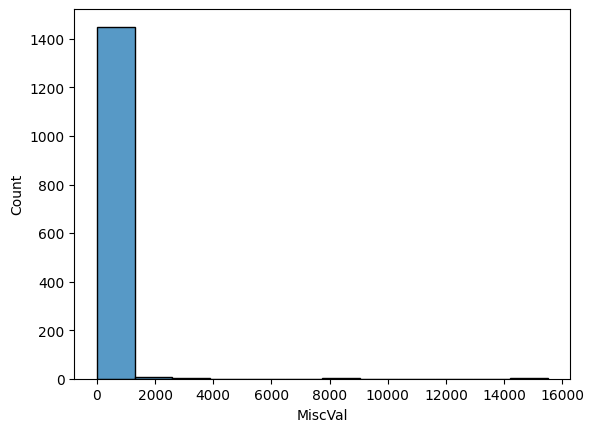

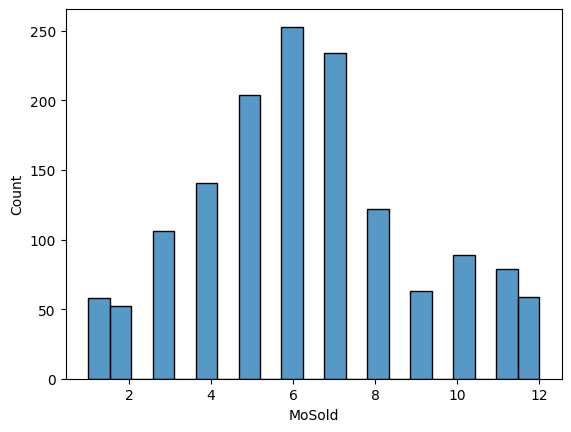

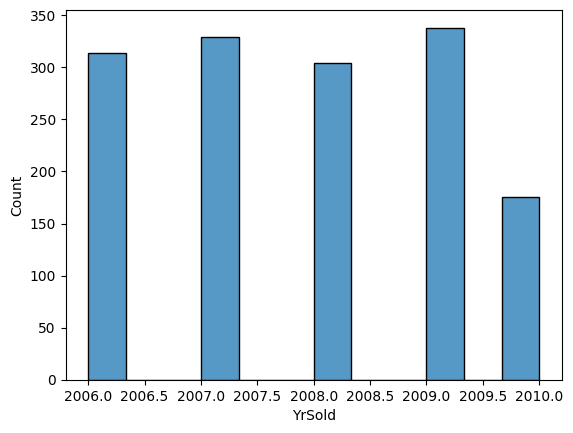

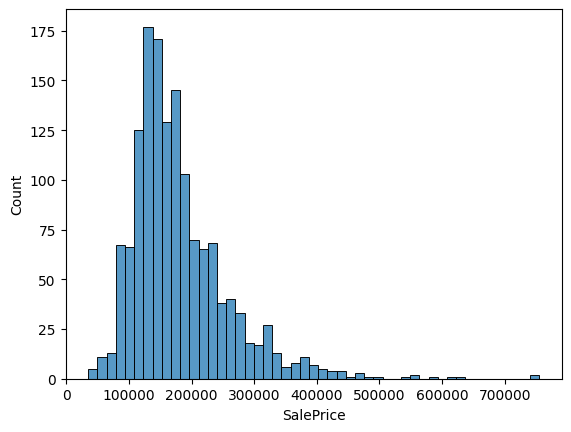

In [12]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.histplot(data=dataset,x=i)
  plt.show()

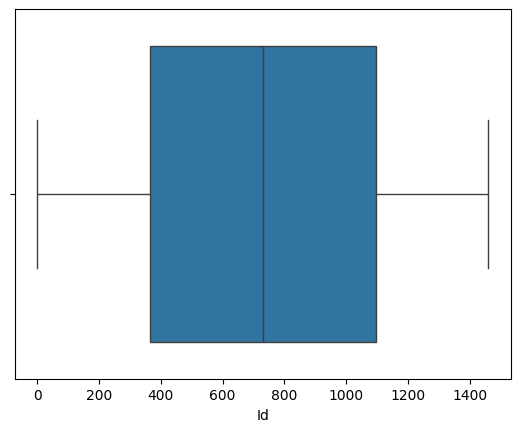

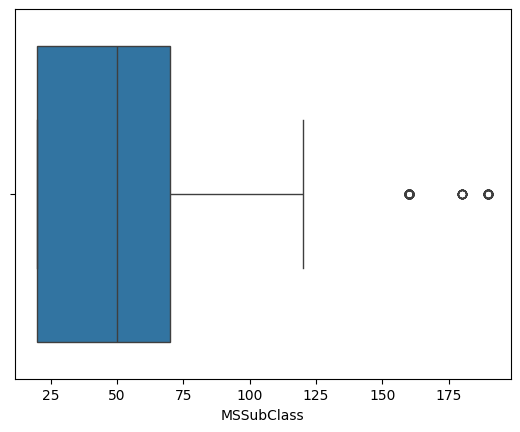

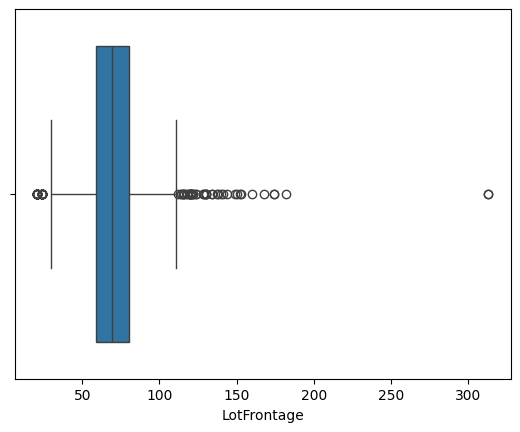

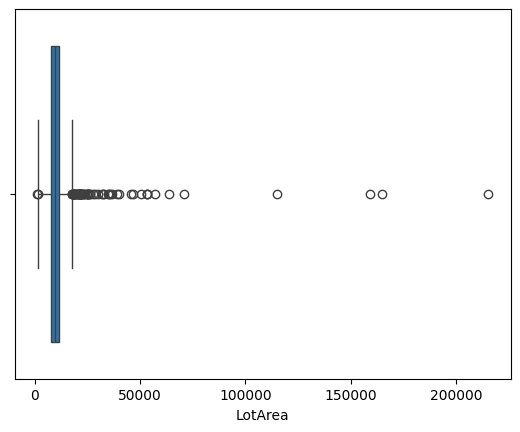

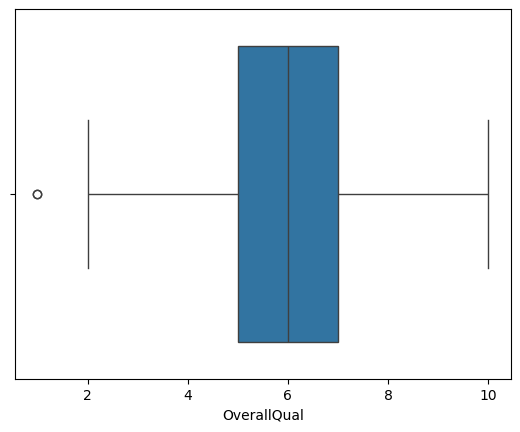

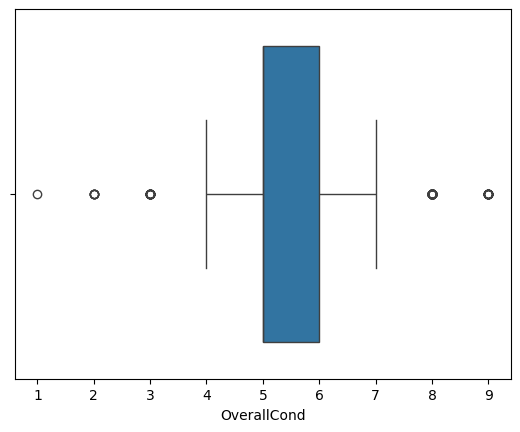

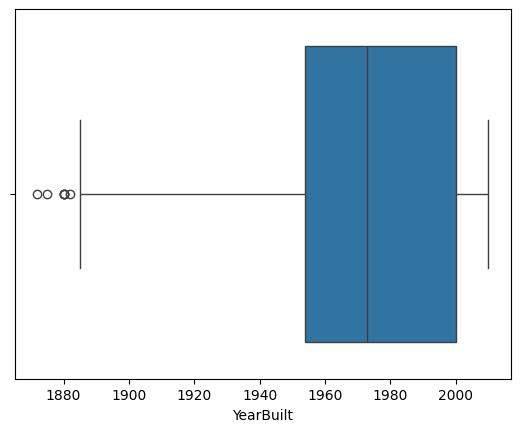

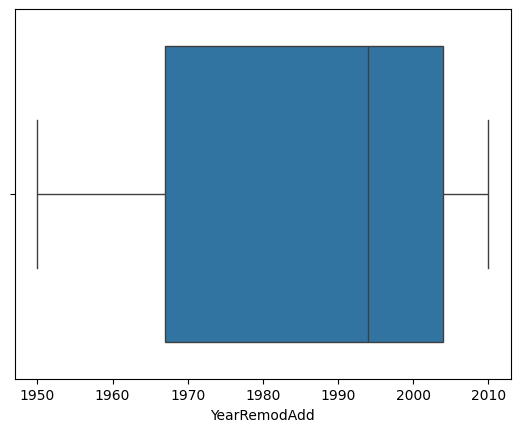

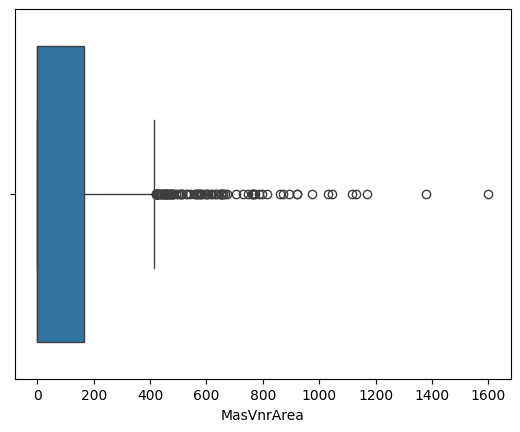

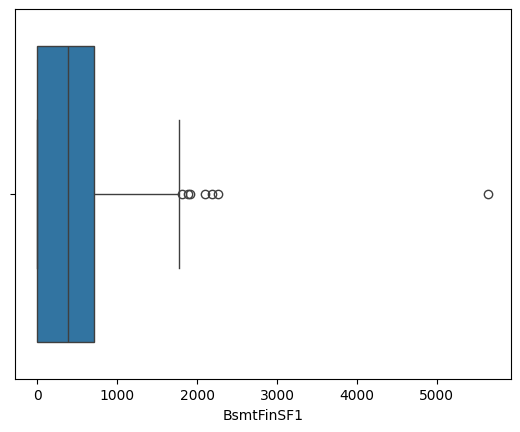

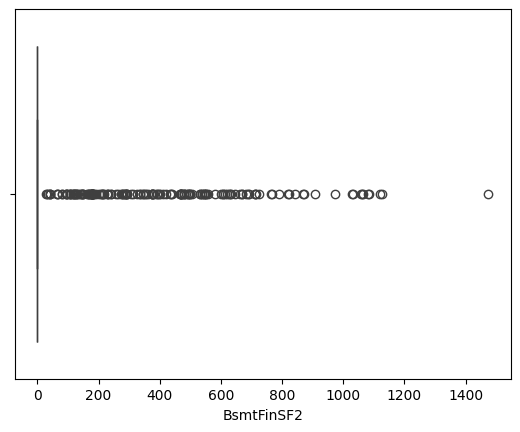

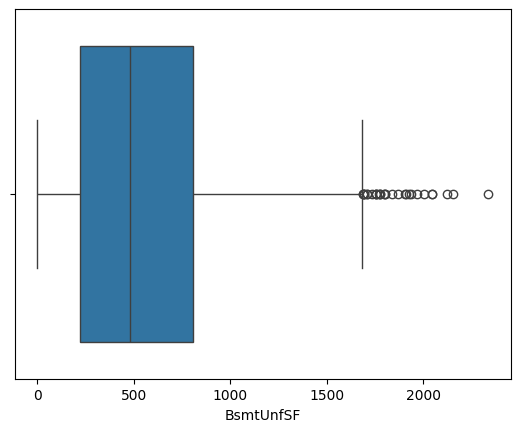

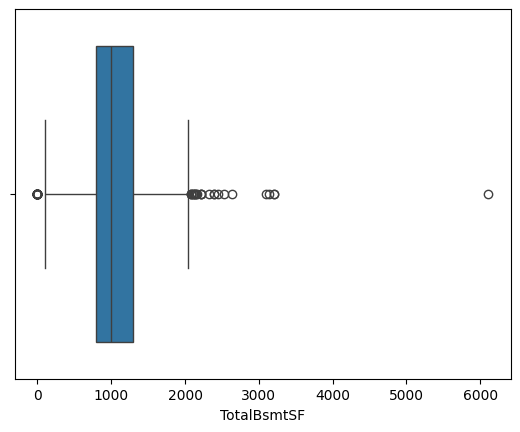

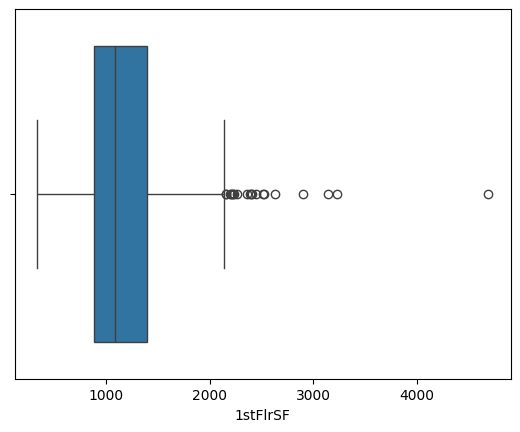

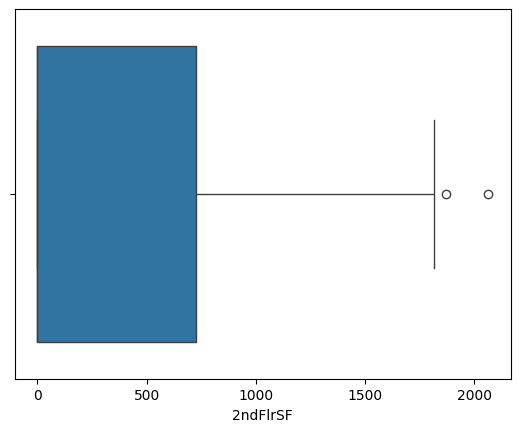

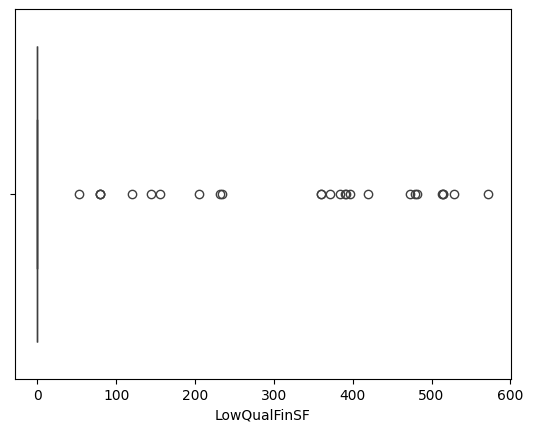

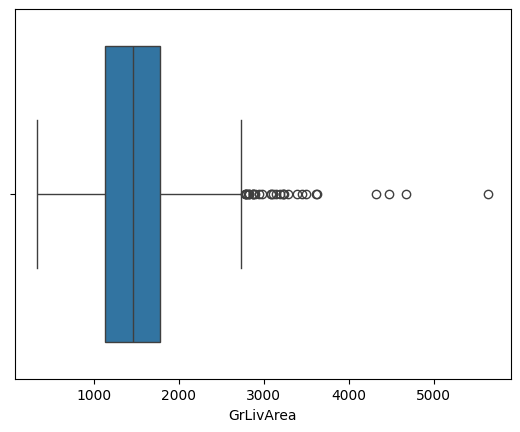

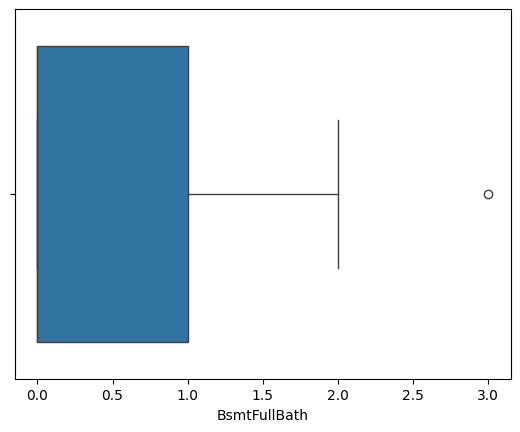

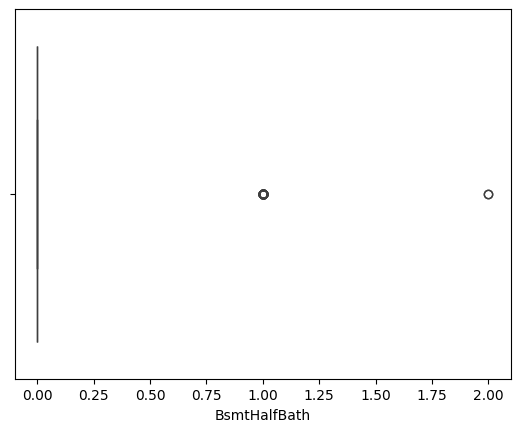

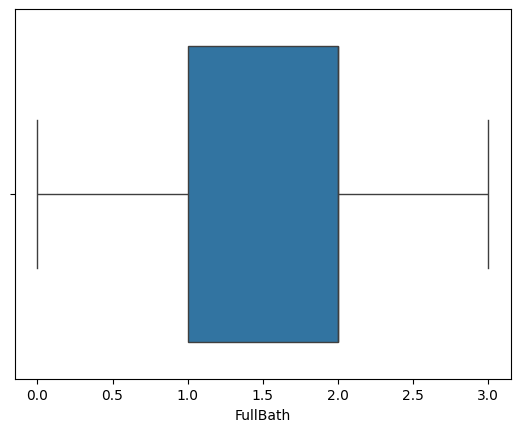

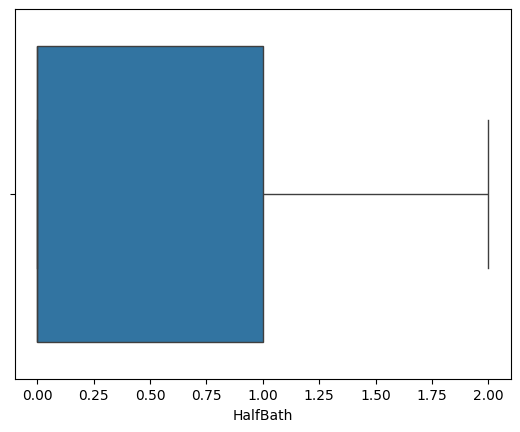

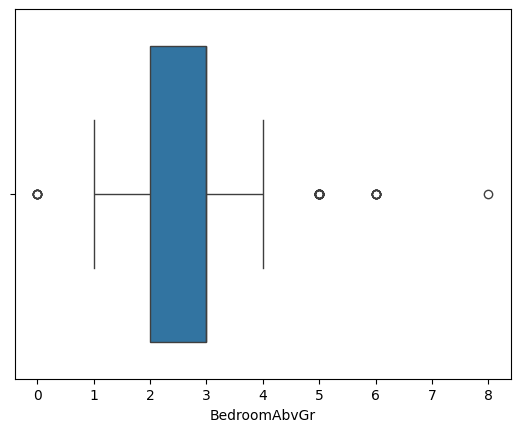

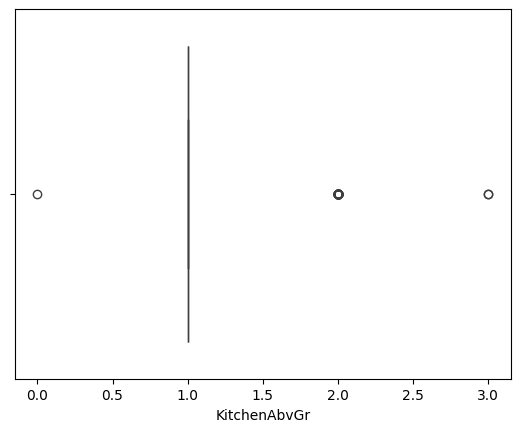

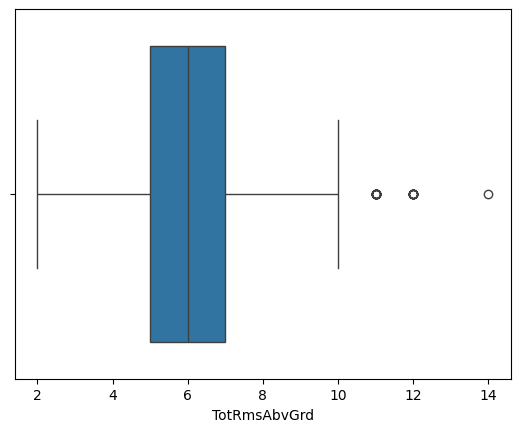

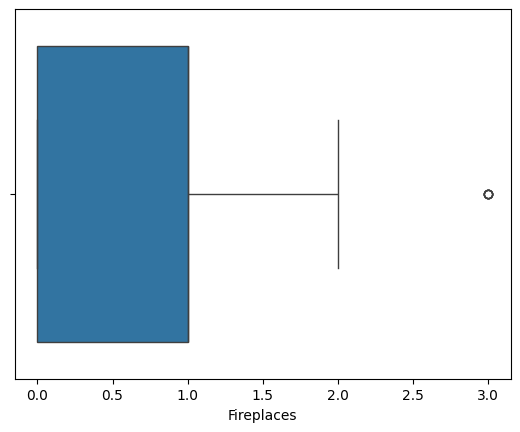

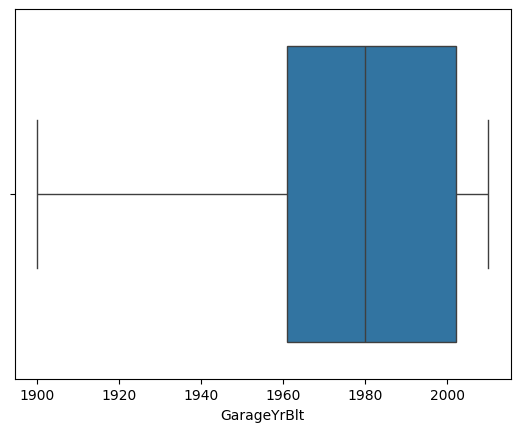

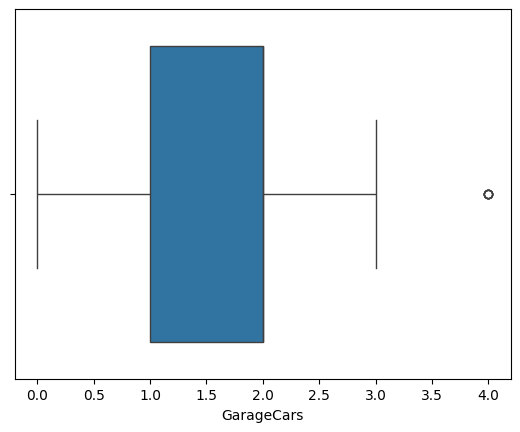

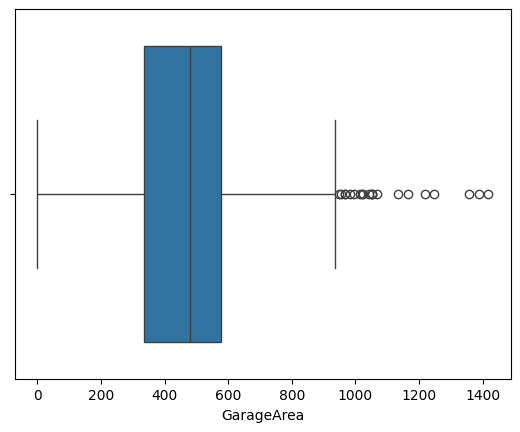

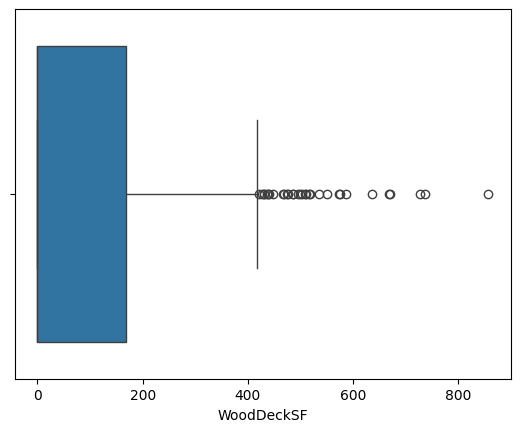

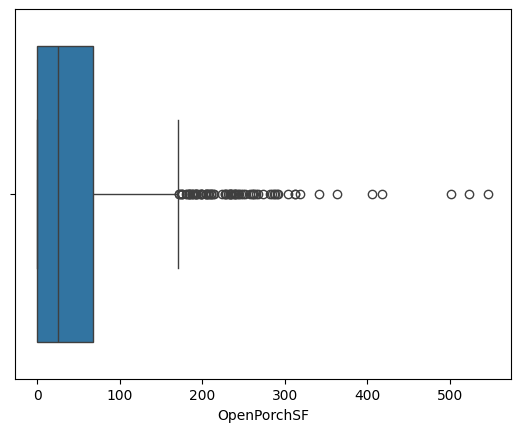

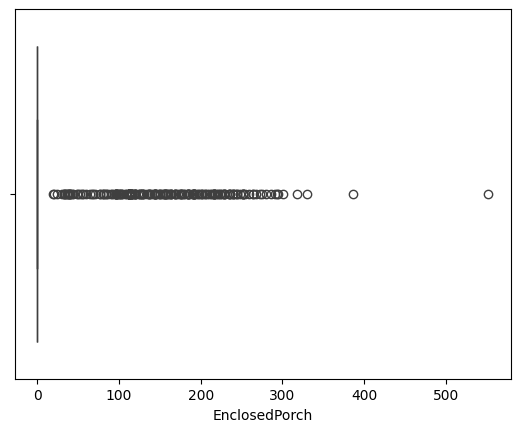

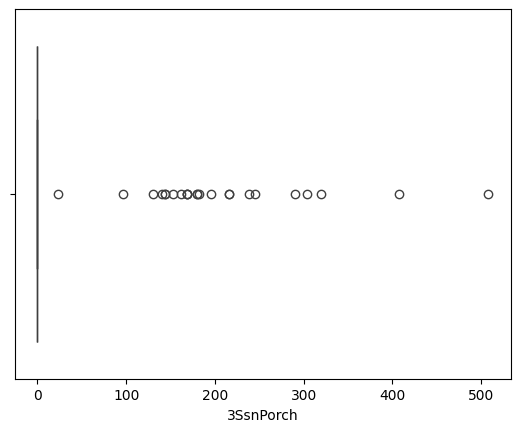

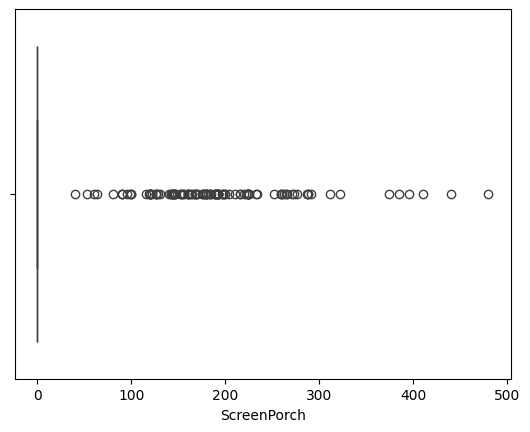

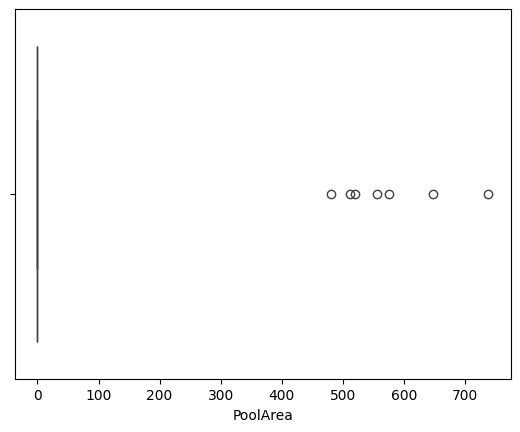

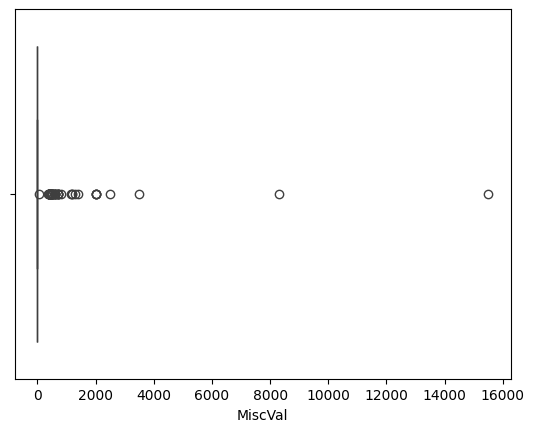

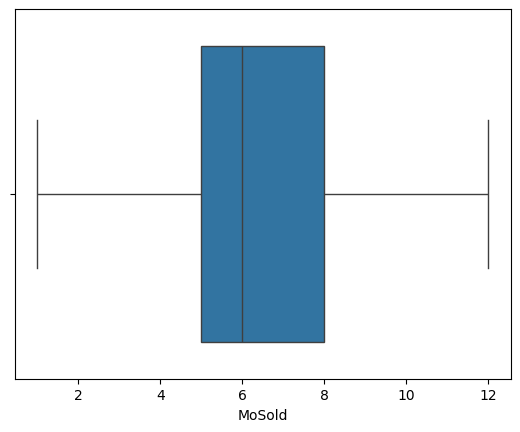

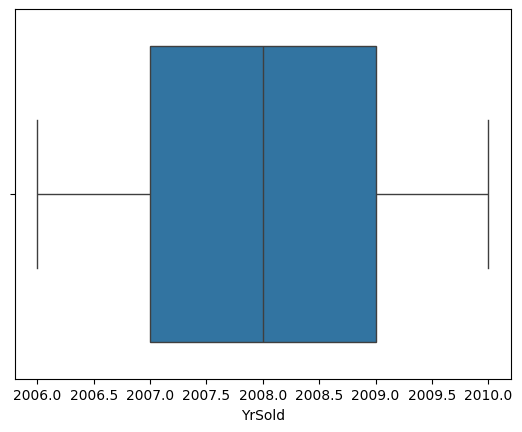

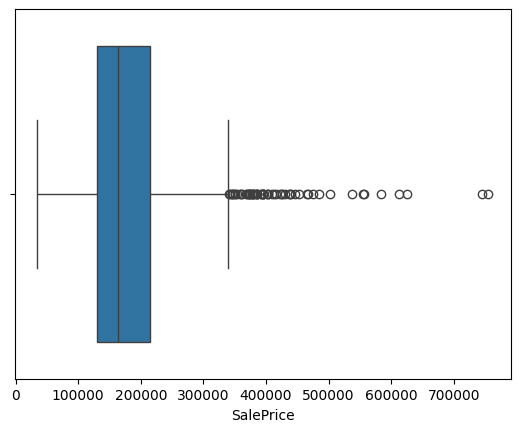

In [13]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.boxplot(data=dataset,x=i)
  plt.show()

In [19]:
numeric_columns = dataset.select_dtypes(include = "number").columns

numeric_features = [col for col in numeric_columns if col != 'SalePrice']

print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


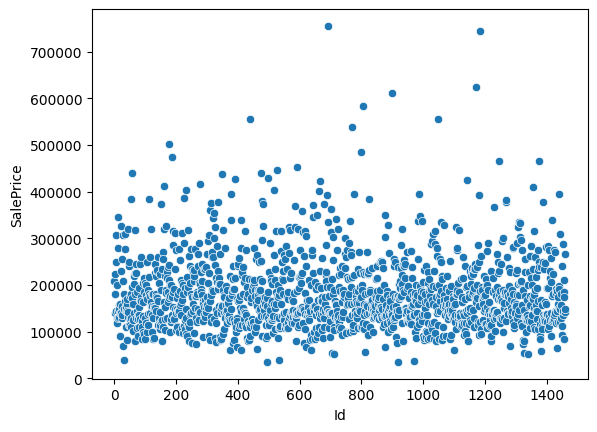

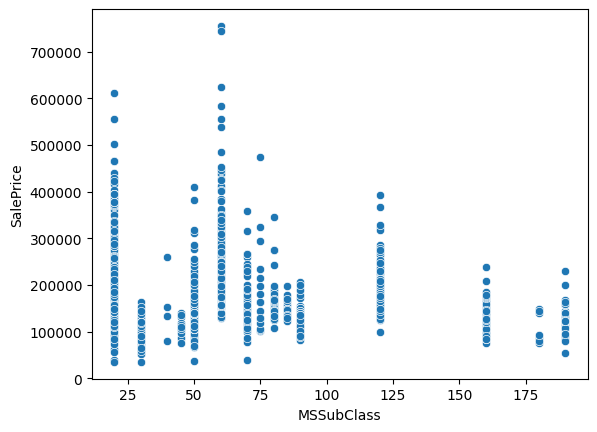

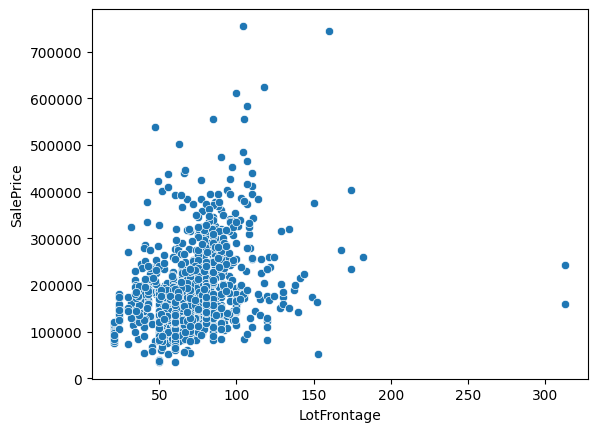

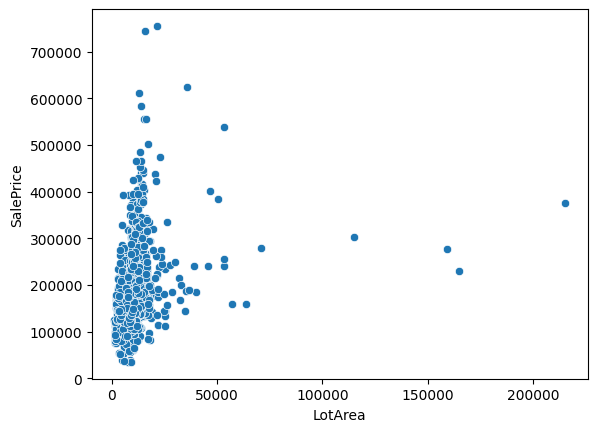

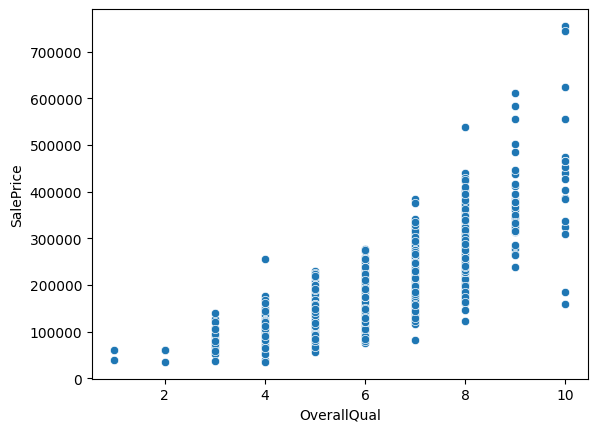

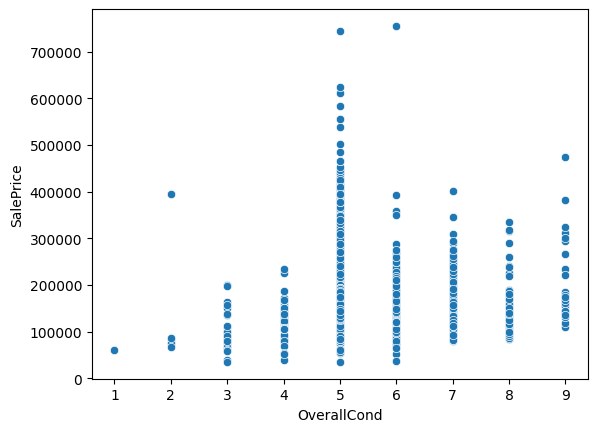

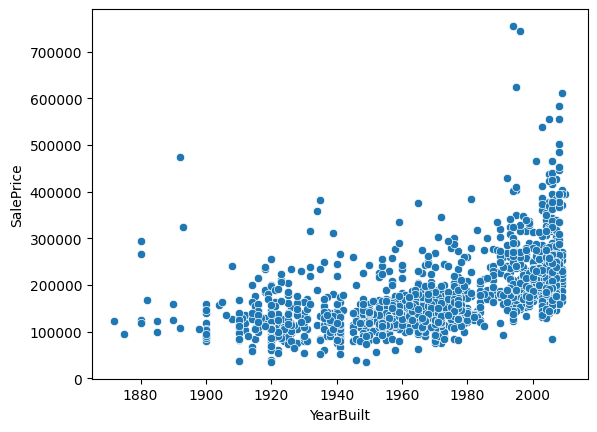

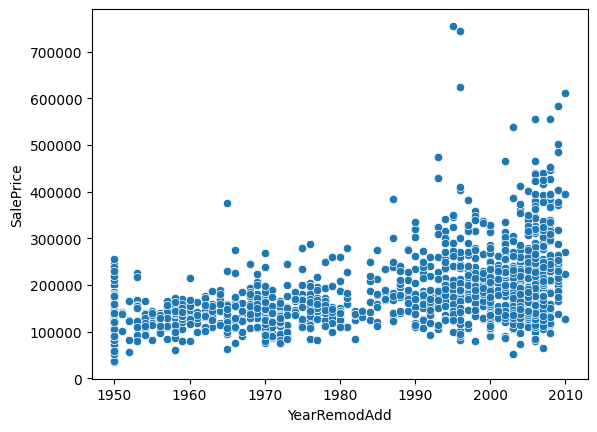

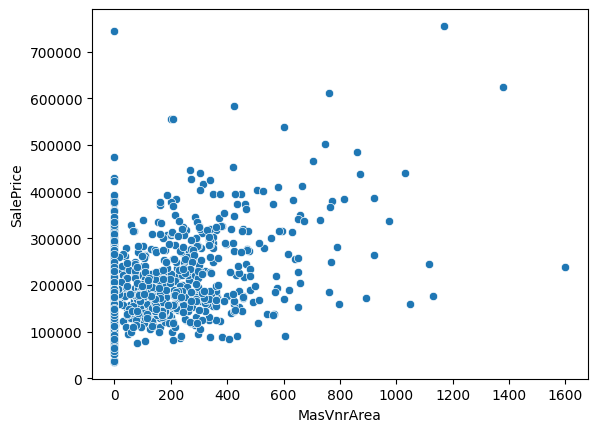

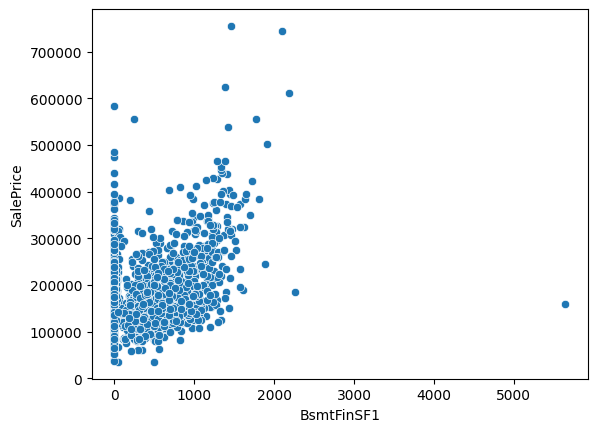

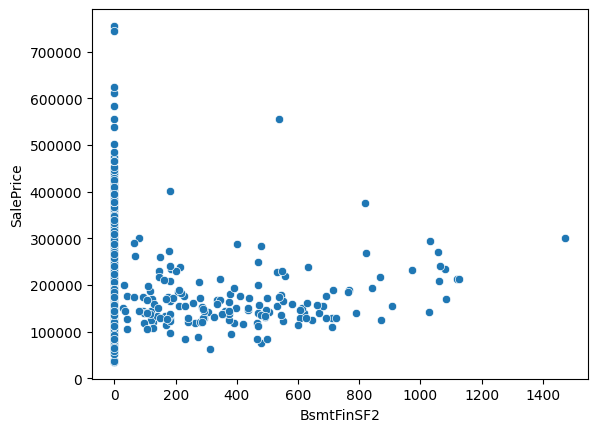

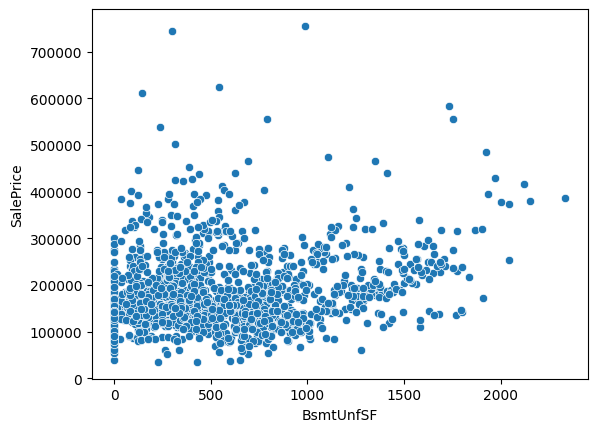

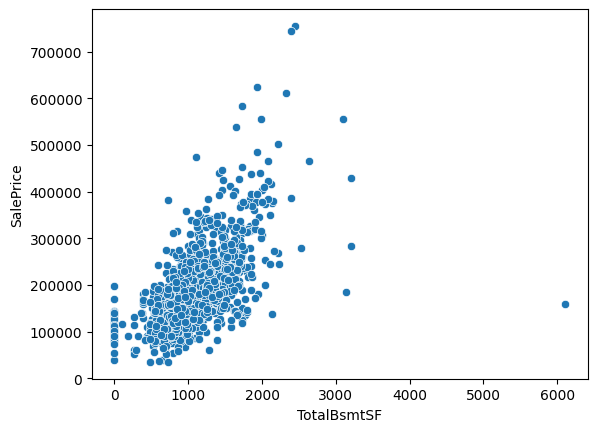

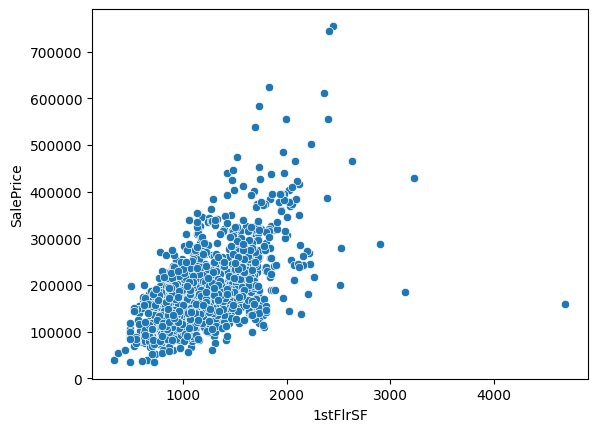

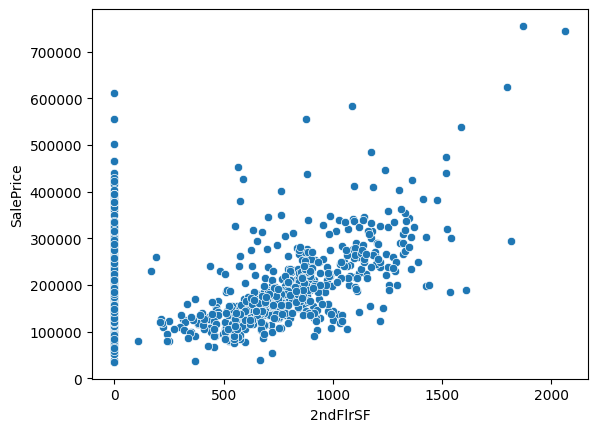

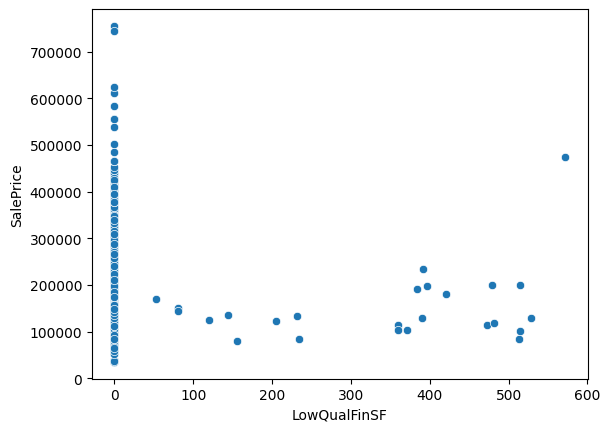

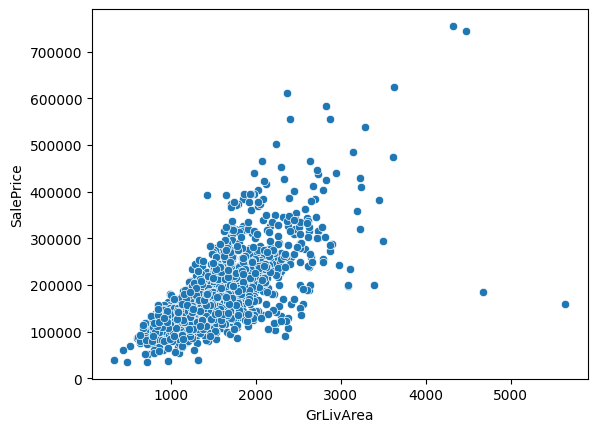

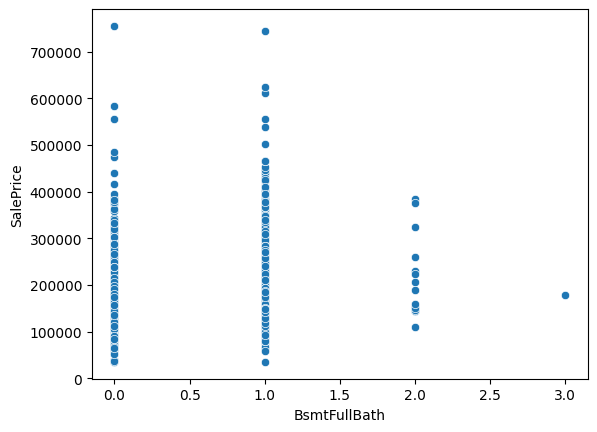

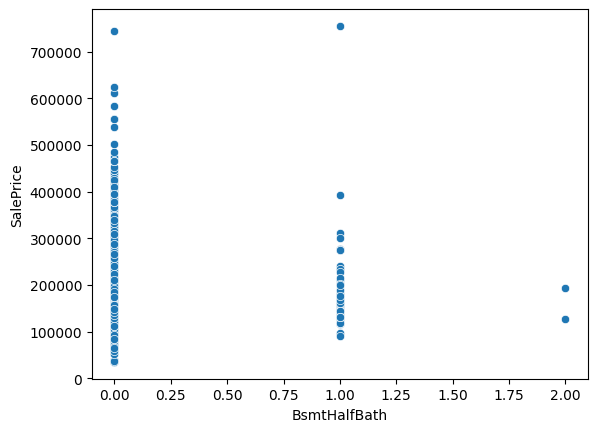

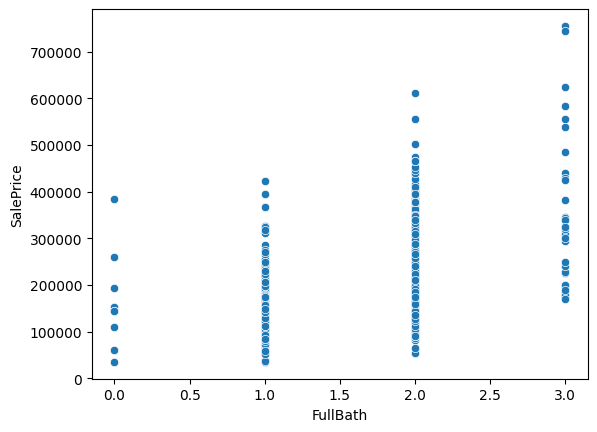

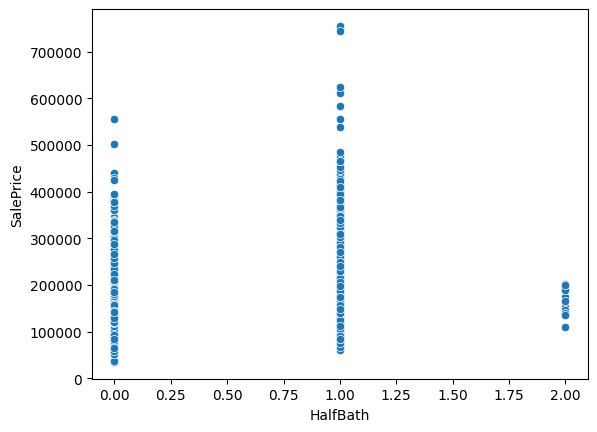

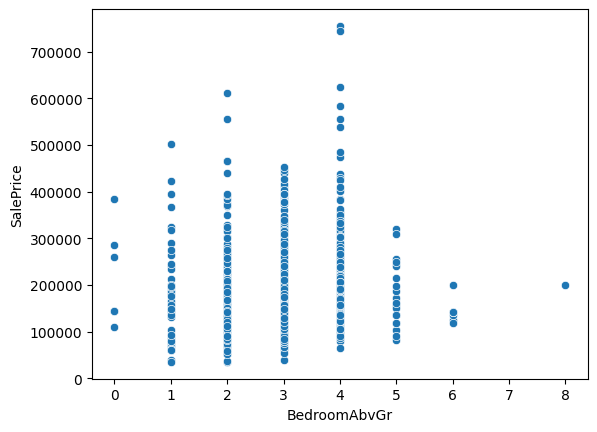

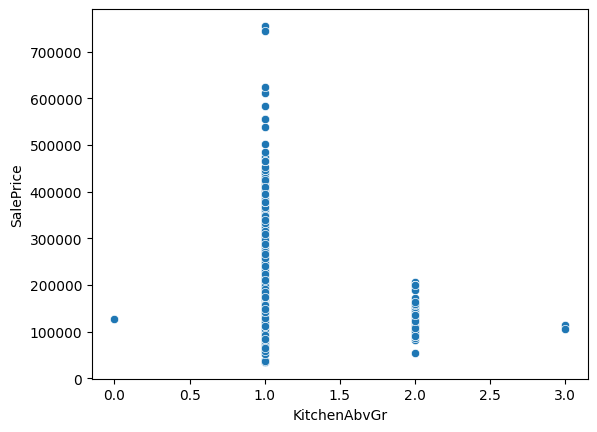

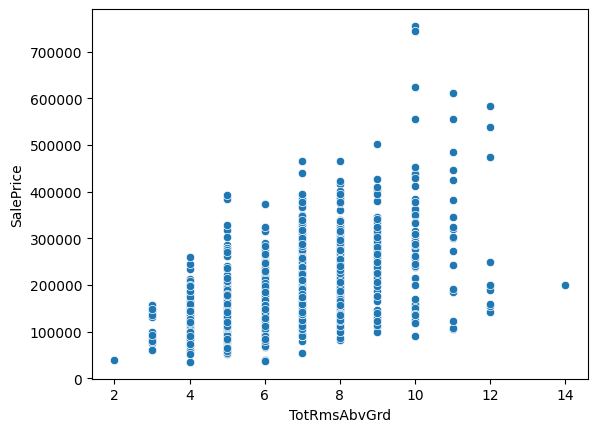

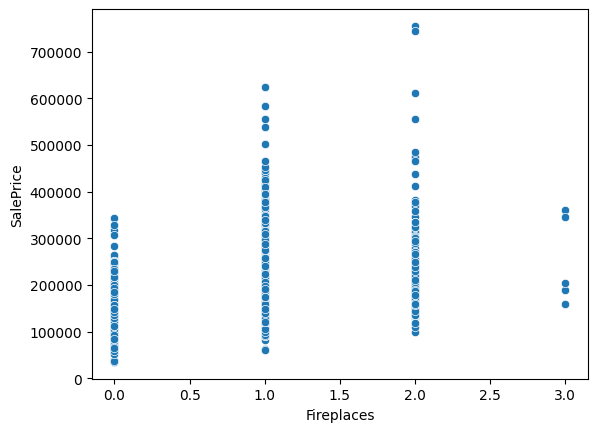

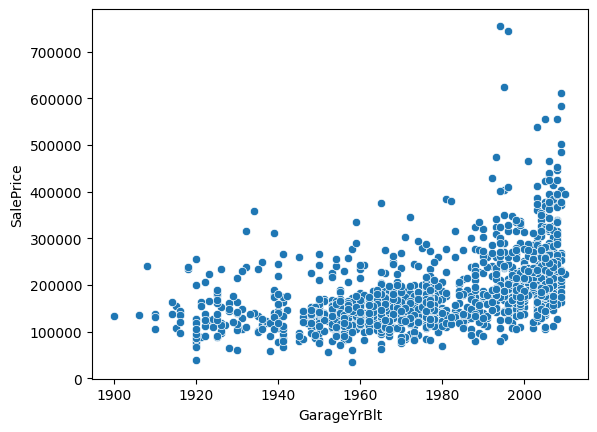

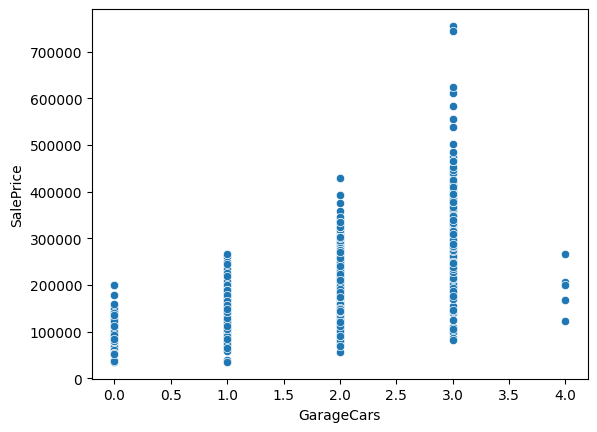

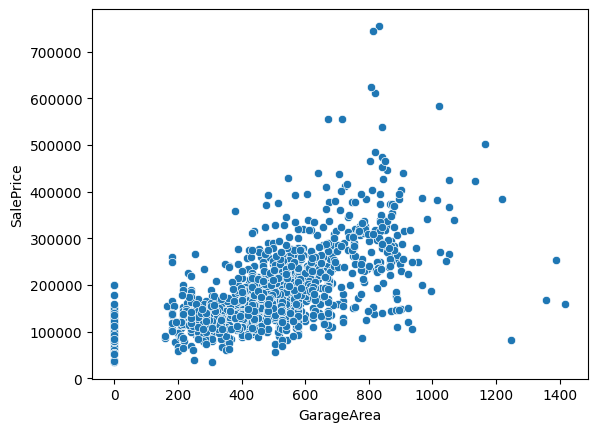

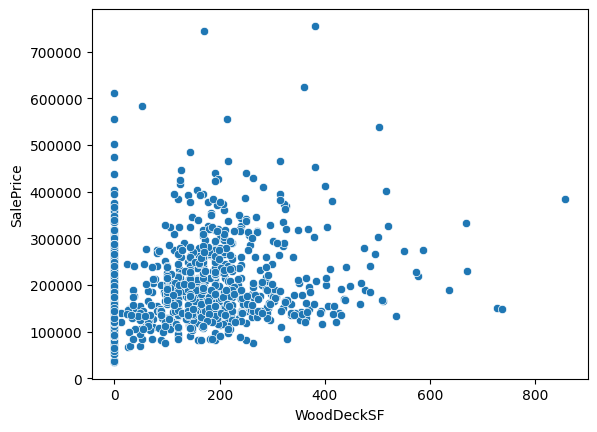

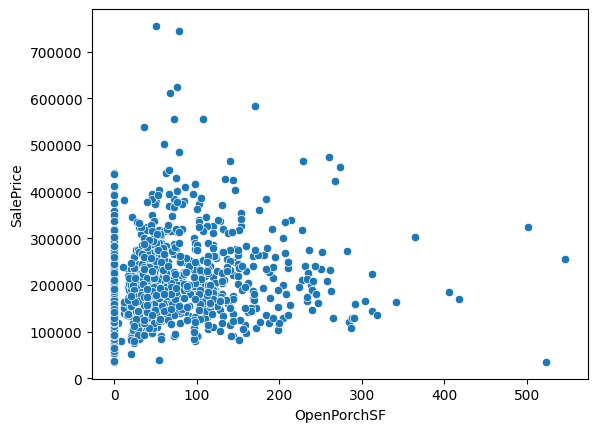

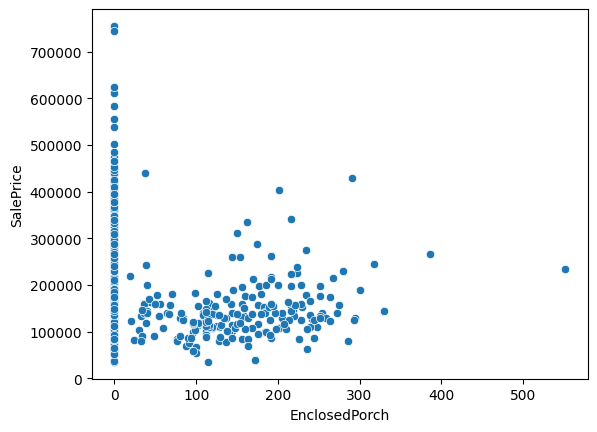

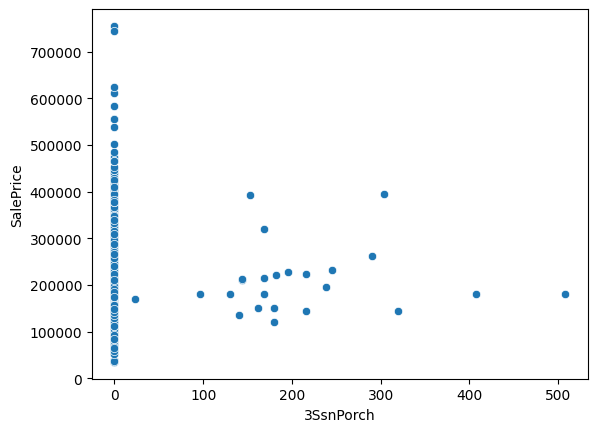

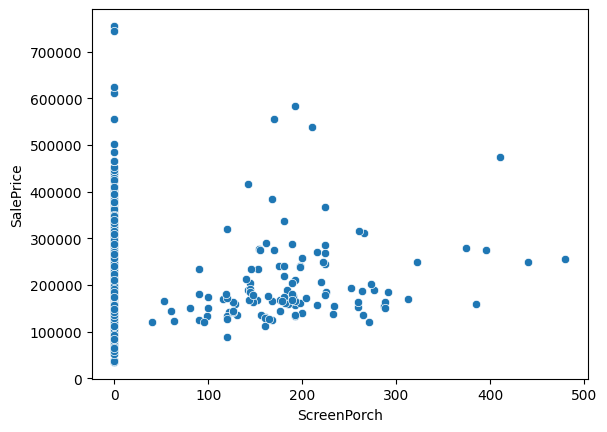

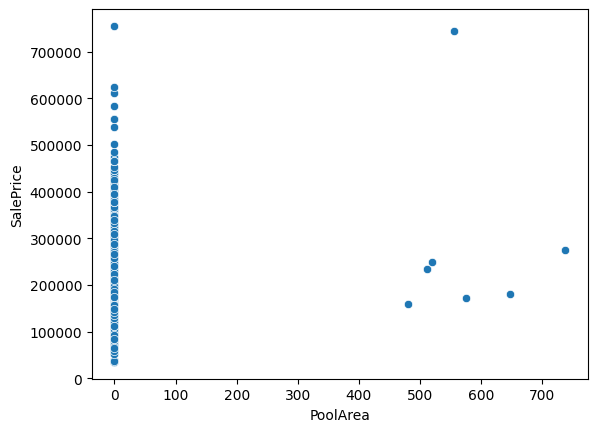

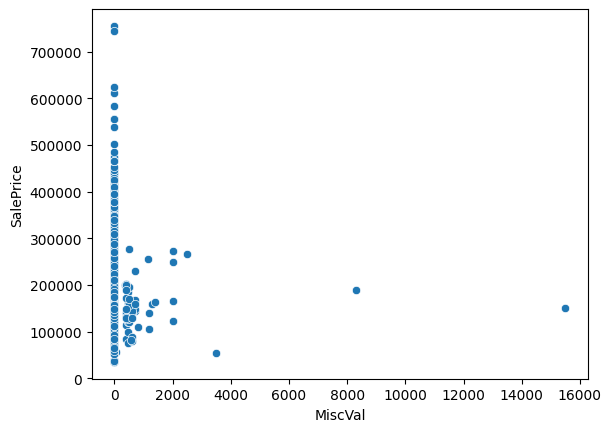

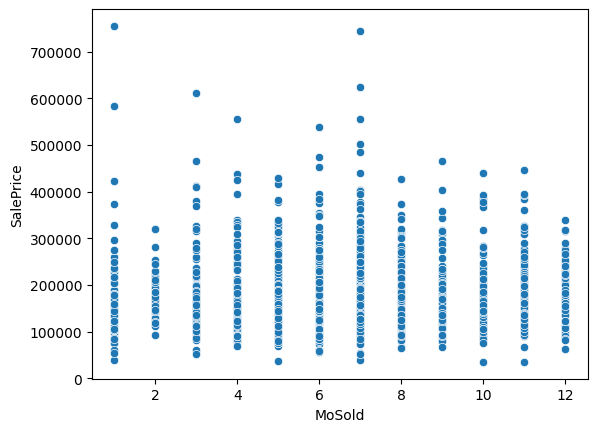

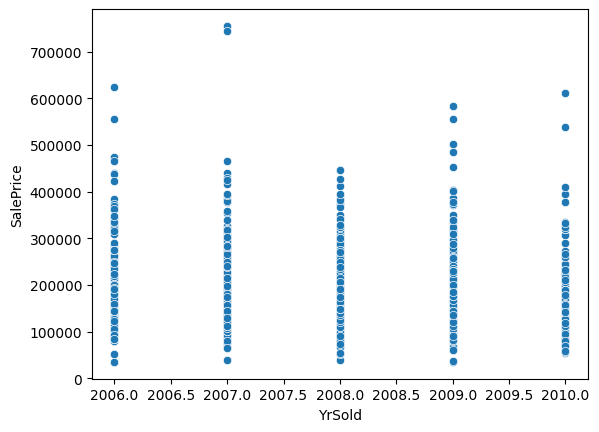

In [20]:
for i in numeric_features:
    sns.scatterplot(data=dataset, x=i, y='SalePrice')
    plt.show()

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
Alley                   1369
MasVnrType               872
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81
PoolQC                  1453
Fence                   1179
MiscFeature             1406


In [25]:
(missing_values/dataset.shape[0])*100

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [26]:
threshold = 0.5
dataset = dataset.dropna(thresh=int(threshold * len(dataset)), axis=1)

In [27]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81


In [28]:
(missing_values/dataset.shape[0])*100

,0
LotFrontage,17.739726
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274
GarageType,5.547945


In [30]:
categorical_features = dataset.select_dtypes(include=['object']).columns

In [31]:
for feature in categorical_features:
    print(f"Unique values for {feature}:")
    print(dataset[feature].unique())
    print("\n")

Unique values for MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values for Street:
['Pave' 'Grvl']


Unique values for LotShape:
['Reg' 'IR1' 'IR2' 'IR3']


Unique values for LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']


Unique values for Utilities:
['AllPub' 'NoSeWa']


Unique values for LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values for LandSlope:
['Gtl' 'Mod' 'Sev']


Unique values for Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values for Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values for Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values for BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


Unique values for HouseStyle:
['2Story' '1Story' '1.5Fin'

In [33]:
pd.set_option('display.max_rows', None)
unique_counts = dataset.nunique()
print(unique_counts)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [34]:
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [38]:
duplicate_ids = dataset[dataset.duplicated(subset=['Id'], keep=False)]
duplicate_ids.sort_values(by='Id', inplace=True)
duplicate_ids.head(6)

<ipython-input-38-c3de3c7d040b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_ids.sort_values(by='Id', inplace=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [39]:
dataset = dataset.drop(columns=['Id'])

In [45]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'

In [48]:
missing_num = [col for col in missing_values.index if col in numerical_cols]
missing_cat = [col for col in missing_values.index if col in categorical_cols]

skewness = dataset[missing_num].skew()

print("Numerical Features with Missing Values:")
print(skewness)

Numerical Features with Missing Values:
LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64


In [50]:
# Select only numerical columns before calculating correlation
numeric_df = dataset.select_dtypes(include=['number'])
correlation = numeric_df.corr()['LotFrontage'].sort_values(ascending=False)

print(correlation)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64


In [58]:
categorical_features = dataset.select_dtypes(include=['object']).columns
anova_results = {}

for col in categorical_features:
    unique_vals = dataset[col].nunique()
    if unique_vals > 1:
        groups = [dataset['LotFrontage'][dataset[col] == category].dropna() for category in dataset[col].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = p_value

anova_results = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}

print("ANOVA Test Results (Categorical vs. LotFrontage):")
print(anova_results)

ANOVA Test Results (Categorical vs. LotFrontage):
{'BldgType': 6.12489392019722e-98, 'Neighborhood': 1.3267045185307417e-67, 'MSZoning': 3.011591628267981e-45, 'RoofMatl': 8.452230069439785e-28, 'LotShape': 1.8440558389244e-19, 'LotConfig': 1.189524337759721e-16, 'RoofStyle': 1.5132052359219602e-12, 'KitchenQual': 7.321569477640566e-12, 'Exterior2nd': 1.8248772973634973e-10, 'ExterQual': 3.2687403717212445e-10, 'Condition1': 3.69786136973514e-08, 'Foundation': 1.7119542347851435e-06, 'Exterior1st': 1.2299039921199178e-05, 'HouseStyle': 2.3666251248610506e-05, 'SaleCondition': 0.00014121938714816047, 'SaleType': 0.0002892188802860444, 'LandContour': 0.0009618605268849334, 'LandSlope': 0.001911274318802548, 'PavedDrive': 0.002744257342836338, 'Condition2': 0.0879376969275672, 'Street': 0.12594402388448625, 'Utilities': 0.5056814677626533, 'ExterCond': 0.5245268391947058, 'BsmtQual': nan, 'BsmtCond': nan, 'BsmtExposure': nan, 'BsmtFinType1': nan, 'BsmtFinType2': nan, 'CentralAir': 0.00495

<ipython-input-58-caf484df67fa>:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


In [59]:
dataset['LotFrontage'] = dataset.groupby(['BldgType', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [60]:
null_lotfrontage = dataset['LotFrontage'].isnull().sum()
print(f"Number of null values in 'LotFrontage' column: {null_lotfrontage}")

Number of null values in 'LotFrontage' column: 2


In [57]:
correlation_masvnr = dataset.corr()['MasVnrArea'].sort_values(ascending=False)
print(correlation_masvnr)

ValueError: could not convert string to float: 'RL'